In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
orderbydate=session.query(Measurement.station,Measurement.date).\
    order_by(Measurement.date.desc()).all()
orderbydate[:5]

[('USC00519397', '2017-08-23'),
 ('USC00514830', '2017-08-23'),
 ('USC00519523', '2017-08-23'),
 ('USC00516128', '2017-08-23'),
 ('USC00519397', '2017-08-22')]

In [14]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
#geting the last date for recorded percipitation and formating it
ld=session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
ld=(f'{ld}')
ld=ld[2:12]
x = dt.datetime.strptime(ld, ('%Y-%m-%d'))

# ld


In [17]:
# 12 month perceipitation query by subtracting 365 days form ld and selecting data and prcp from measurment table
date = x - dt.timedelta(365)
twelvperc=session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date> date).\
    order_by(Measurement.date.desc()).all()
len(twelvperc)

df = pd.DataFrame(twelvperc, columns=[ 'Percipitation', 'date'])
df=df.dropna()
df=df.sort_values('date')
df.set_index('date', inplace=True, )

# df["Percipitation"].max()

# date=[i[1] for i in twelvperc[::]]
# perc=[i[1] for i in df[::]]
# perc


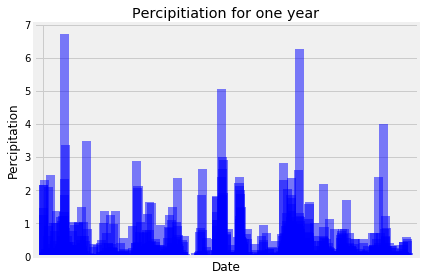

In [18]:
x_axis = np.arange(len(df))
plt.bar(x_axis , df["Percipitation"],width=50, color='b', alpha=0.5, align="center")
plt.title("Percipitiation for one year")
plt.xlabel("Date")
plt.xticks(np.arange(0.001))
plt.xlim(-50, len(x_axis)+50)
plt.tick_params(axis='x',which='both', bottom=False, top=False,labelbottom=False)
plt.ylabel("Percipitation")
plt.tight_layout()


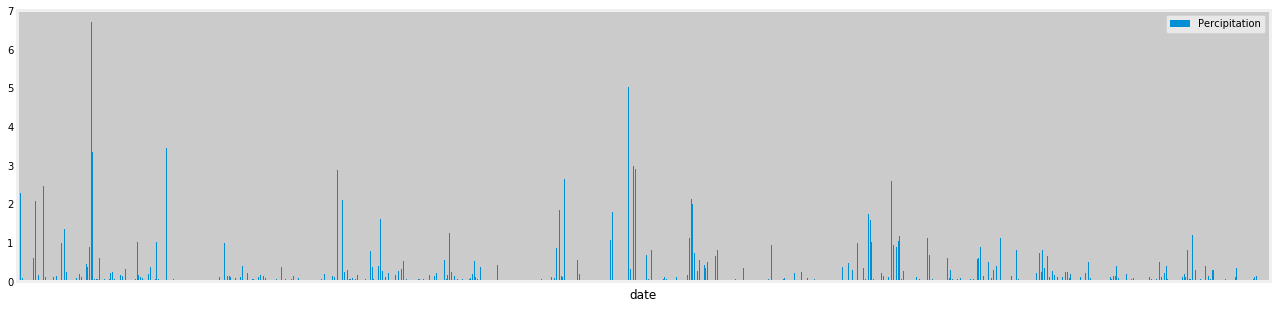

<Figure size 432x288 with 0 Axes>

In [19]:
plot =df.plot(kind="bar", figsize=(20,5))

plot.set_xticklabels([])

plt.show()
plt.clf()

# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [22]:
df.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
#Design a query to show how many stations are available in this dataset?

stationc=session.query(Station.station).all()
len(stationc)

9

In [24]:
# Design a query to show how many stations are available in this dataset?


In [25]:
# stationa=session.query[Measurement.station.\
#     func.avg(Measurement.prcp).\
#     order_by(Measurement.date.desc()).\
#             group_by(Measurement.station)].all()

sel=[Measurement.station,func.count(Measurement.prcp)]
active_stations=session.query(*sel).group_by(Measurement.station).\
order_by(Measurement.prcp.desc()).all()
active_stations_df = pd.DataFrame(active_stations, columns=[ 'station', 'activity'])
active_stations_df
active_stations_df=active_stations_df.sort_values('activity',ascending=False)
active_stations_df.set_index('station', inplace=True, )
active_stations_df

,activity
station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [26]:
#variable holding most active station
iactive_stations_df=active_stations_df.reset_index()
s=iactive_stations_df.loc[0]['station']
s

'USC00519281'

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [29]:
#selection temps for as station


stationsel=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs) ).\
        filter(Measurement.station == s ).all()
stationsel

[(54.0, 85.0, 71.66378066378067)]

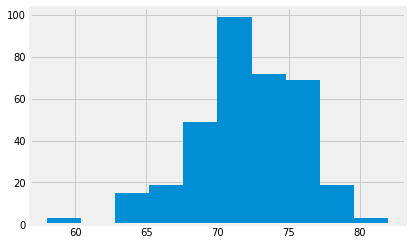

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
selt=[Measurement.station,func.count(Measurement.tobs)]
active_stationst=session.query(*selt).group_by(Measurement.station).\
order_by(Measurement.tobs.desc()).all()
active_stations_dft = pd.DataFrame(active_stations, columns=[ 'station', 'activity'])
active_stations_dft
active_stations_dtf=active_stations_df.sort_values('activity',ascending=False)
active_stations_dft.set_index('station', inplace=True, )
#variable holding most active station temp
iactive_stations_dft=active_stations_dft.reset_index()
st=iactive_stations_dft.loc[0]['station']
date = x - dt.timedelta(365)
activetemp=session.query(Measurement.tobs,Measurement.date).\
    filter(Measurement.date> date).\
    filter(Measurement.station== st).\
    order_by(Measurement.date.desc()).all()
# len(activetemp)
#     group_by(Measurement.tobs).\
activetemp_df= pd.DataFrame(activetemp, columns=[ 'Temp', 'date'])
# activetemp_df=activetemp_df.dropna()
# activetemp_df=activetemp_df.sort_values('Temp')
activetemp_df.set_index('date', inplace=True, )

hist = activetemp_df["Temp"].hist()


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
xt=(calc_temps('2011-02-28', '2011-03-05'))
print(xt)

[(61.0, 69.75510204081633, 75.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


Text(0,0.5,'Temp(F)')

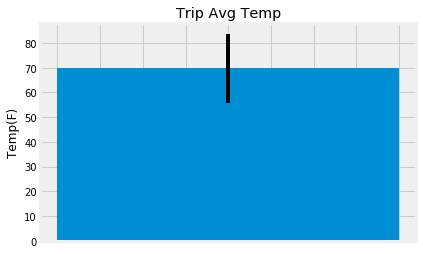

In [119]:
# x_axis = np.arange(len(xt))
# plt.bar(x_axis , xt ,width=50, color='b', alpha=0.5, align="center")
# plt.title("Percipitiation for one year")
# plt.xlabel("Date")
# plt.xticks(np.arange(0.001))
# plt.xlim(-50, len(x_axis)+50)
# plt.tick_params(axis='x',which='both', bottom=False, top=False,labelbottom=False)
# plt.ylabel("Percipitation")
# plt.tight_layout()


tmin,tave, tmax = zip(*xt)
xmin=list(tmin)
xmax=list(tmax)
xave=list(tave)
errmin=xave[0]-xmin[0]
errmax=xmax[0]-xave[0]
errmaxmin=xmax[0]-xmin[0]
ex=int(errmax)
em=int(errmin)
emm=int(errmaxmin)
z=[em,ex]
x_axis = np.arange(len(tmin)) 
plt.bar(x_axis, tave, yerr=emm, align='center')

plt.tick_params(axis='x',which='both', bottom=False, top=False,labelbottom=False)


plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")

In [120]:
# xmin=list(tmin)
# xmax=list(tmax)
# xave=list(tave)
# errmin=xmin[0]-xave[0]
# errmax=xmax[0]-xave[0]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [130]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel1=[Measurement.station,func.count(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation]
station_rain=session.query(*sel1).filter(Measurement.station == Station.station).\
filter(Measurement.date >= '2011-02-28').filter(Measurement.date <= '2011-03-05').group_by(Measurement.station).\
order_by(Measurement.prcp.desc()).all()
station_rain
station_rain_df= pd.DataFrame(station_rain, columns=[ 'station', 'prcp','name','lat','lon','elav'])
station_rain_df

,station,prcp,name,lat,lon,elav
0,USC00518838,4,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
1,USC00511918,5,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
2,USC00519397,6,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
3,USC00516128,6,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00514830,5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519281,6,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00519523,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00513117,6,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
8,USC00517948,0,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
